In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", "complete_network", "supercomputer", "networks")

In [3]:
folder = "ratio"

In [4]:
e = Experiments()
e.add_experiment(name="p1",
                 color="black",
                 label="P1 only",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5")
e.add_experiment(name="p1_p2",
                 color="red",
                 label="P1+p2",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-40_p1_p2.hdf5")


   

In [5]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p05/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p05/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-40_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions


In [6]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
spiking_analysis_dict = spiking_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids)


 Identifying spiking neurons within the network 
Analysing p1
Analysing p1_p2


In [7]:
p = calculate_ratio(dictionary=spiking_analysis_dict)
n = normalized_prp(dictionary=p, normalized="p1")

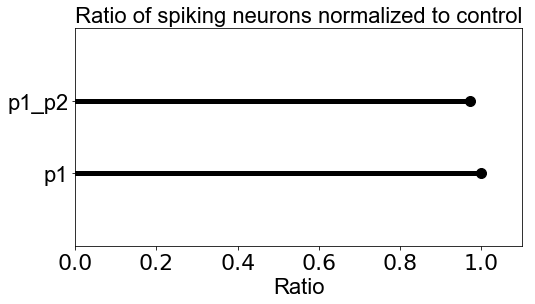

In [8]:
plot_ratio_normalized_spiking(ratio_dict=n, experiment_names=e, fig_name=neuron_type, folder=folder, save=True, max_ratio=1.1)

In [9]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
spiking_analysis_dict = spiking_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids)


 Identifying spiking neurons within the network 
Analysing p1
Analysing p1_p2


In [10]:
p = calculate_ratio(dictionary=spiking_analysis_dict)
n = normalized_prp(dictionary=p, normalized="p1")

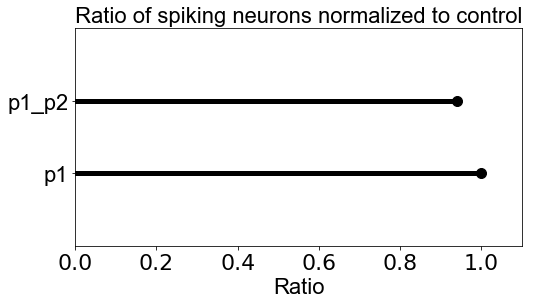

In [11]:
plot_ratio_normalized_spiking(ratio_dict=n, experiment_names=e, fig_name=neuron_type, folder=folder, save=True, max_ratio=1.1)